In [1]:
import argparse
import torch
import torch.nn as nn
import pytorch_lightning as pl
from matformer.tokenizers import ByteLevelTokenizer
from matformer.model_config import ModelConfig  
from matformer.models import EntropyModel
import matplotlib.pyplot as plt

In [2]:
def entropy_plot(entropy,text):
    plt.figure(figsize=(20,3))
    plt.plot(entropy.cpu(), marker='o', markersize=4, linestyle='-', linewidth=1)
    pos=range(0,len(text),1)
    plt.xticks(pos,text,rotation=0)
    plt.xlabel('Chars')
    plt.ylabel('Entropy')
    plt.title('Entropy per char')
    plt.grid(True,alpha=0.3)
    plt.tight_layout()
    plt.show()

In [3]:
checkpoint_path = "/home/matteo/Ricerca/miei_progetti/matformer/ll2048_model/last.ckpt"

In [4]:
model,config = EntropyModel.load_from_checkpoint(checkpoint_path, map_location='cpu', inference_fix=True)
print(f"Model loaded. Config = {config}")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Found this config:
ModelConfig(hidden_dim=768, ffn_factor=1.0, n_layers=10, n_heads=12, vocab_size=261, pad_id=260, bos_id=0, eos_id=1, tie_word_embeddings=False, rms_norm_eps=1e-06, attention_type=['causal', 'sliding'], sliding_window_size=1024, sliding_layers=[0, 1, 2, 3, 8, 9], sliding_type='partial', max_seqlen=2047, block_size_for_attention=128, compile_flexattn=False, bias=False, name='Entropy Model')
Model loaded. Config = ModelConfig(hidden_dim=768, ffn_factor=1.0, n_layers=10, n_heads=12, vocab_size=261, pad_id=260, bos_id=0, eos_id=1, tie_word_embeddings=False, rms_norm_eps=1e-06, attention_type=['causal', 'sliding'], sliding_window_size=1024, sliding_layers=[0, 1, 2, 3, 8, 9], sliding_type='partial', max_seqlen=2046, block_size_for_attention=128, compile_flexattn=False, bias=False, name='Entropy Model')


/home/matteo/envs/torch-cuda/lib/python3.13/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [5]:
text="Questa è una prova del modelo di Entropia. Dove otterremo i valori più alti?"
text="Ciao e benvenuto nel forum! Hai già provveduto ad acquistare un ingranditore e quindici metri di pellicola Ilford HP5? Un caro saluto"
#text="Questa è una parola. Mentre dsjforwanvn sono lettere a caso. Cosa sucede con i numeri: 1 1997 1972 324 27"
text="Il pianale su cui nacque la nuova AX fu di nuova progettazione e incorporava quelle soluzioni di meccanica che avrebbero garantito maneggevolezza, agilità e tenuta di strada ai vertici della sua categoria."

In [6]:
entropy=model.compute_entropy(text)

/home/matteo/Ricerca/miei_progetti/matformer/matformer/models.py:136: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prompt_ids=torch.tensor(tokenizer.encode(prompt).unsqueeze(0), device=self.device)
/home/matteo/envs/torch-cuda/lib/python3.13/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/matteo/envs/torch-cuda/lib/python3.13/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/matteo/envs/torch-cuda/lib/python3.13/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/matteo/envs/torch-cuda/lib/python3.13/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/

In [8]:
cut=model.cut_text(text,cutting_points=None,smoothing=0.5)

/home/matteo/Ricerca/miei_progetti/matformer/matformer/models.py:136: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prompt_ids=torch.tensor(tokenizer.encode(prompt).unsqueeze(0), device=self.device)
/home/matteo/envs/torch-cuda/lib/python3.13/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/matteo/envs/torch-cuda/lib/python3.13/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/matteo/envs/torch-cuda/lib/python3.13/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/matteo/envs/torch-cuda/lib/python3.13/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/

In [9]:
cut

['Il',
 ' pian',
 'al',
 'e',
 ' su',
 ' cui',
 ' nacqu',
 'e',
 ' la',
 ' nuova',
 ' AX fu',
 ' di',
 ' nuova',
 ' pr',
 'oget',
 'tazion',
 'e',
 ' e',
 ' i',
 'ncorporav',
 'a',
 ' q',
 'uel',
 'le',
 ' soluzion',
 'i',
 ' di',
 ' meccan',
 'ic',
 'a',
 ' che',
 ' avrebb',
 'ero',
 ' garantito',
 ' ma',
 'neggevo',
 'lezza,',
 ' agilità',
 ' e ',
 'tenuta ',
 'di ',
 'stra',
 'da ',
 'ai ',
 've',
 'rtici ',
 'dell',
 'a ',
 'sua ',
 'ca',
 'tegoria',
 '.']

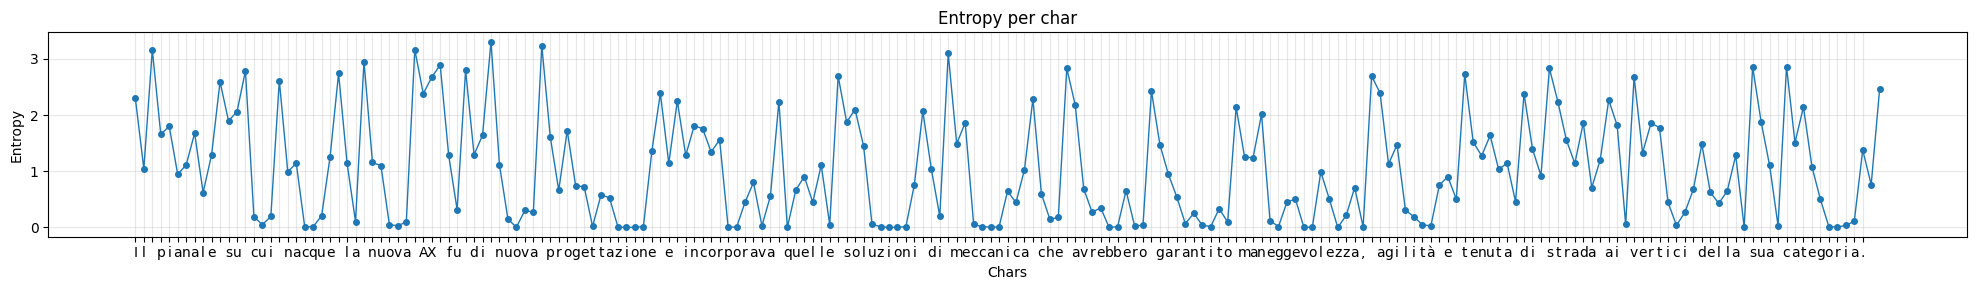

In [8]:
entropy_plot(entropy,text)

In [9]:
def monotonicity_breakpoints(entropy,smoothing=0.2):
    cutting_mask=torch.zeros(entropy.size(0),device='cpu')
    cutting_points=list()
    prev_entr=float('inf')
    start_point=0
    for i in range(len(entropy.cpu())):
        #print(f"{i}, {prev_entr}, {entr}")
        if entropy.cpu()[i]>prev_entr+smoothing:
            cutting_points.append((start_point,i))
            cutting_mask[i]=1
            start_point=i
        prev_entr=entropy.cpu()[i]
    return cutting_points,cutting_mask

def cut_text(text,cutting_points):
    """
    Cut a text according to cutting points
    """
    text_chunks=[text[i:j] for i,j in cutting_points]
    return text_chunks
    
        

In [9]:
backward=torch.cat([entropy[1:], torch.zeros(1, device=entropy.device)])

In [11]:
forward = torch.cat([torch.zeros(1, device=entropy.device), entropy[:-1]])

In [20]:
entropy

tensor([2.2974e+00, 1.0444e+00, 3.1619e+00, 1.6595e+00, 1.7994e+00, 9.4541e-01,
        1.1133e+00, 1.6801e+00, 6.2197e-01, 1.2921e+00, 2.5939e+00, 1.8983e+00,
        2.0595e+00, 2.7874e+00, 1.9085e-01, 4.9125e-02, 1.9613e-01, 2.6159e+00,
        9.9063e-01, 1.1430e+00, 1.1771e-02, 1.2073e-02, 2.1049e-01, 1.2624e+00,
        2.7433e+00, 1.1478e+00, 1.0398e-01, 2.9544e+00, 1.1569e+00, 1.1008e+00,
        5.1786e-02, 2.7682e-02, 1.0123e-01, 3.1669e+00, 2.3812e+00, 2.6742e+00,
        2.8927e+00, 1.2870e+00, 3.1613e-01, 2.8006e+00, 1.2946e+00, 1.6415e+00,
        3.3087e+00, 1.1159e+00, 1.4836e-01, 3.3934e-03, 3.0301e-01, 2.7355e-01,
        3.2389e+00, 1.6128e+00, 6.5997e-01, 1.7254e+00, 7.3929e-01, 7.2790e-01,
        1.8042e-02, 5.8414e-01, 5.2495e-01, 4.7252e-03, 7.9542e-04, 1.8586e-03,
        1.5265e-02, 1.3627e+00, 2.3877e+00, 1.1406e+00, 2.2515e+00, 1.2827e+00,
        1.8118e+00, 1.7587e+00, 1.3432e+00, 1.5628e+00, 1.1912e-02, 1.9139e-03,
        4.4833e-01, 8.0162e-01, 2.7009e-

In [14]:
points,mask=monotonicity_breakpoints(entropy,smoothing=1.3)

In [19]:
mask

tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [15]:
patches=cut_text(text,points)
print(patches)

['Il', ' pianale', ' su cui', ' nacque', ' la', ' nuova', ' AX fu', ' di', ' nuova', ' progettazion', 'e e incorporava', ' quelle', ' soluzioni', ' di', ' meccanica che', ' avrebbero', ' garantito', ' maneggevolezza,', ' agilità e ', 'tenuta ', 'di ', 'strada ai ', 'vertici della ', 'sua ', 'categoria.']


In [17]:
[x for x in patches[0].encode('utf-8')]

[73, 108]

In [125]:
byte_embeddings=nn.Embedding(261, 768)

In [130]:
_bytes=model.tokenizer([text])

In [132]:
h=byte_embeddings(_bytes)

In [134]:
patches_boundaries=points

In [143]:
batch_size = h.size(0)
num_patches = len(patches_boundaries)
hidden_dim = h.size(-1)
patches = torch.zeros(batch_size, num_patches, hidden_dim, device=h.device)

In [144]:
patches.shape

torch.Size([1, 36, 768])

In [148]:
class LpPooling(torch.nn.Module):
    def __init__(self, dim=0, p=2, keepdim=False):
        super().__init__()
        self.dim = dim
        self.p = torch.nn.Parameter(torch.tensor(float(p)))
        self.keepdim = keepdim

    def forward(self, x):
        p_clamped = torch.clamp(self.p, min=1e-6)
        return torch.pow(torch.mean(torch.pow(torch.abs(x), p_clamped), dim=self.dim, keepdim=self.keepdim), 1 / p_clamped)

In [149]:
lp_pooling=LpPooling()

In [150]:
for batch_idx in range(batch_size):
            for patch_idx, (start, end) in enumerate(patches_boundaries):
                chunk = h[batch_idx, start:end, :]
                patches[batch_idx, patch_idx, :] = pooling(chunk)

In [158]:
prova=nn.Parameter(data=torch.tensor(0.1))

In [159]:
prova

Parameter containing:
tensor(0.1000, requires_grad=True)